## Library Imports

In [1]:
import pandas as pd
import re, string
import numpy as np

## Data Import

In [2]:
real = pd.read_json('FakeNews-Ham.json')
fake = pd.read_json('FakeNews-Spam.json')

## Inspect Data

In [3]:
real.head()

,published_date,title,text,url,medium
0,2019/05/26,WATCH: Women part of Ramaphosa's inauguration,Major Mandisa Mfeka is South Africa's first bl...,http://www.enca.com/life/watch-women-part-rama...,eNCA Online
1,2019/08/20,Former SABC interim board members slam SIU rep...,Former SABC interim board members reacted with...,http://www.timeslive.co.za/news/south-africa/2...,The Times
2,2018/09/11,White media are the true state capture winners...,The spokesperson for political party Black Fir...,http://citizen.co.za/news/south-africa/2007534...,The Citizen
3,2020/01/08,Mkhwebane 'driven by reckless determination to...,Lawyers acting for President Cyril Ramaphosa i...,http://www.news24.com/SouthAfrica/News/mkhweba...,News24
4,2019/01/16,2 KZN cops charged with murder after shooting ...,"Mxolisi Mngadi Handcuffs. (Duncan Alfreds, New...",http://www.news24.com/SouthAfrica/News/2-kzn-c...,News24


In [4]:
fake.head()

,published_date,title,text,url,medium
0,"JULY 9, 2020",Idols Viggy and Virginia bought their first ca...,Idols runners up Viggy and Virginia also known...,http://search67.com/2020/07/09/idols-viggy-and...,search67
1,"JULY 9, 2020",#1millionGraves S.A government is preparing mo...,#1millionGraves The South African Government i...,http://search67.com/2020/07/09/1milliongraves-...,search67
2,"JULY 9, 2020",Petition to get justice for Lebogang Masinga #...,"We wish to get justice for Lebogang Masinga, a...",http://search67.com/2020/07/09/petition-to-get...,search67
3,"JULY 7, 2020",North West Premier Job Mokgoro (72) tested pos...,"North West Premier, Prof Tebogo Job Mokgoro, a...",http://search67.com/2020/07/07/north-west-prem...,search67
4,"JULY 7, 2020",Primary and Secondary School learners to retur...,Learners in Kenya will return to school in 202...,http://search67.com/2020/07/07/primary-and-sec...,search67


In [5]:
fake.describe()

,published_date,title,text,url,medium
count,505,505,505,505,505
unique,267,494,497,494,5
top,"August 29, 2019",Three Persons In critical conditions following...,POST 07/23 : REGISTRY CLERK National Prosecuti...,http://www.trendsdaily.co.za/metro-new/just-in...,mzanzi stories
freq,17,2,2,2,277


## Combine Data

In [6]:
real = real[0:505]

In [7]:
real.describe()

,published_date,title,text,url,medium
count,505,505,505,505,505
unique,401,504,505,505,16
top,2017/04/06,WATCH,"To many of his Facebook followers, Conty Lebep...",http://www.sowetanlive.co.za/business/2019-04-...,News24
freq,3,2,1,1,73


In [8]:
# Add `real` column to `real` with value 1
real['real'] = 1

# Add `real` column to `fake` with value 0
fake['real'] = 0

# Append `fake` to `real`
news = real.append(fake, ignore_index=True)

In [9]:
news.sample(5)

,published_date,title,text,url,medium,real
305,2020/04/16,COVID-19 Frontline Workers: Private clinic own...,Tens of thousands of South African healthcare ...,http://www.sabcnews.com/sabcnews/covid-19-fron...,SABC Online News,1
300,2017/02/17,The Trumpian Gauleiters,Aside from all the other threats on the immedi...,http://www.dailymaverick.co.za/article/2017-02...,Daily Maverick,1
443,2018/03/15,We are still in business - Toys R Us South Afr...,CAPE TOWN - Toys R Us South Africa has confirm...,http://www.iol.co.za/business-report/companies...,IOL,1
900,2019/03/11,Video: Drunk Itumeleng Khune 'i want to swipe ...,Video: Bad friends film Itumeleng Khune 'i wan...,https://www.mzansistories.com/2019/03/video-dr...,mzanzi stories,0
79,2017/06/20,'Disrespected' Buthelezi lashes out after conf...,About 500 delegates who were set to attend a t...,http://city-press.news24.com/News/disrespected...,News24,1


## Remove Stopwords

In [10]:
# Import Stopwords
stopwords = set(line.strip() for line in open('stopwords.txt'))

#punctuation = [".", ",", ":", "!", "*", "'s", "-"]
#punc = r'\b(?:{})\b'.format('|'.join(punctuation))
punc = r'(\'s)'
regex = re.compile('[%s]' % re.escape(string.punctuation))

In [11]:
news['text'] = news['text'].apply(lambda x: regex.sub('',' '.join([item for item in str(x).lower().replace("'s", "").split() 
                                                                   if item not in stopwords])))

In [12]:
news.sample(5)

,published_date,title,text,url,medium,real
675,"August 30, 2019",Two Men Arrested In Connection With The Murder...,police arrested men aged 26 34 zakariyya park ...,http://www.trendsdaily.co.za/metro-new/two-men...,trendsdaily.co.za,0
883,2017/12/31,Robbie Malinga's Son looks like Letsholonyane ...,robbie malinga son looks reneilwe letsholonyan...,https://www.mzansistories.com/2017/12/robbie-m...,mzanzi stories,0
178,2017/12/13,David Byrne announces 'ambitious' new tour,york rock icon david byrne planning tour ultr...,http://www.enca.com/life/entertainment/david-b...,eNCA Online,1
151,2017/11/29,CT blockchain start-up enables free banking in...,wala cape townbased blockchain startup gearing...,http://www.moneyweb.co.za/news/tech/ct-blockch...,Moneyweb,1
202,2019/10/07,OP-ED: Hands off Zondo - the commission is wor...,government particular ruling elite stop recycl...,http://www.dailymaverick.co.za/article/2019-10...,Daily Maverick,1


## Restructure Data

In [13]:
news_text = news.drop(['published_date', 'title', 'url', 'medium'], axis=1)

In [14]:
news_text.sample(5)

,text,real
101,report private investigators looking allegatio...,1
521,r350 unemployment grant application declined l...,0
332,australian immigration minister peter dutton a...,1
228,pressure rising global health officials debati...,1
79,500 delegates set attend threeday conference s...,1


In [15]:
classification = news_text.real

In [16]:
news_text = news_text.drop(['real'], axis=1)

## Load Google News Trained Word2Vec Model

In [17]:
from gensim.models import KeyedVectors, Word2Vec
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation

Using TensorFlow backend.


In [18]:
word2vec = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', \
        binary=True)
print('Found %s word vectors of word2vec' % len(word2vec.vocab))

Found 3000000 word vectors of word2vec


## Tokenize Words

In [19]:
NUM_WORDS = 200000

tokenizer = Tokenizer(num_words=NUM_WORDS)
tokenizer.fit_on_texts(news_text['text'])

In [20]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 26507 unique tokens.


In [21]:
text = tokenizer.texts_to_sequences(news_text['text'])
text = pad_sequences(text)

In [ ]:
h_d = []
for i in news_text['text']:
    h_d.append(i.split())
print(h_d[:2])

## Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text, classification, test_size=0.2, stratify=classification)

In [23]:
X_train

array([[    0,     0,     0, ...,  1949,   346,   852],
       [    0,     0,     0, ...,  7560,  6499,  6748],
       [    0,     0,     0, ...,  3093,   572,   233],
       ...,
       [    0,     0,     0, ...,    32,   390,  2049],
       [    0,     0,     0, ...,   290,   808,   402],
       [    0,     0,     0, ...,   366,   141, 23570]])

In [24]:
X_train.shape

(808, 3168)

## Embed Words

In [25]:
EMBEDDING_DIM=300
vocabulary_size=min(len(word_index)+1,NUM_WORDS)
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
for word, i in word_index.items():
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word2vec[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

del(word2vec)

In [26]:
embedding_matrix.shape

(26508, 300)

In [27]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.26367188, -0.01916504,  0.02893066, ..., -0.06689453,
         0.20703125, -0.13867188],
       [-0.02478027, -0.10986328,  0.06591797, ...,  0.0402832 ,
         0.48632812, -0.26757812],
       ...,
       [-0.15937707,  0.05549108, -0.474475  , ...,  0.7437565 ,
         0.52394842, -0.29630136],
       [-0.1935058 ,  0.18109067,  1.00156616, ...,  1.15384252,
        -0.43089966,  0.32161463],
       [ 0.13574219,  0.22558594, -0.51953125, ...,  0.08837891,
         0.05004883, -0.10498047]])

## LSTM Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, MaxPool1D, Dropout, Dense, GlobalMaxPooling1D, Embedding, Activation, Flatten

In [26]:
#w2vc_model = Word2Vec(h_d, size=50, workers=8, min_count=1, window=3)
#print(w2vc_model)

Word2Vec(vocab=26507, size=50, alpha=0.025)


In [38]:
X_train_2 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_2 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [39]:
X_train_2.shape

(808, 3168, 1)

In [55]:
# build the model
model = Sequential()
#model.add(Embedding(input_dim = vocabulary_size, output_dim = 120))
#model.add(Dropout(0.2))
#model.add(LSTM(120, return_sequences=True))
#model.add(GlobalMaxPooling1D())
#model.add(Dropout(0.2))
#model.add(Dense(1))
#model.add(Activation('sigmoid'))
#model.summary()

# Input layer
model.add(Embedding(input_dim = vocabulary_size, output_dim = 128))

# Hidden layers
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) #return_sequences=True,
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

#model.add(Flatten())

#model.add(GlobalMaxPooling1D())

model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output Layer
model.add(Dense(1))

In [56]:
# compile and train model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_2, y_train, batch_size=4, validation_data=(X_test_2, y_test), epochs=12)

Epoch 1/12
202/202 [==============================] - 820s 4s/step - loss: 0.6509 - accuracy: 0.6634 - val_loss: 0.5677 - val_accuracy: 0.7327
Epoch 2/12
202/202 [==============================] - 760s 4s/step - loss: 0.3096 - accuracy: 0.9542 - val_loss: 2.4616 - val_accuracy: 0.7426
Epoch 3/12
202/202 [==============================] - 723s 4s/step - loss: 0.2014 - accuracy: 0.9678 - val_loss: 2.6221 - val_accuracy: 0.7475
Epoch 4/12
202/202 [==============================] - 729s 4s/step - loss: 0.1889 - accuracy: 0.9728 - val_loss: 2.6098 - val_accuracy: 0.6782
Epoch 5/12
202/202 [==============================] - 733s 4s/step - loss: 3.2329 - accuracy: 0.7859 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 6/12
202/202 [==============================] - 736s 4s/step - loss: 7.6934 - accuracy: 0.5012 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 7/12
202/202 [==============================] - 750s 4s/step - loss: 7.6934 - accuracy: 0.5012 - val_loss: 7.7125 - val_accuracy: 0.5000

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [32]:
# Check tensorflow version
#if float(tf.__version__[0]) < 2.3:
#  print('Updating tensorflow')
#  !pip install tensorflow==2.3
#else:
#  print('Correct version of Tensorflow installed.')

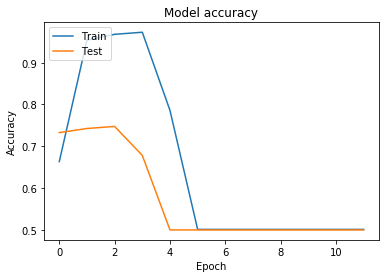

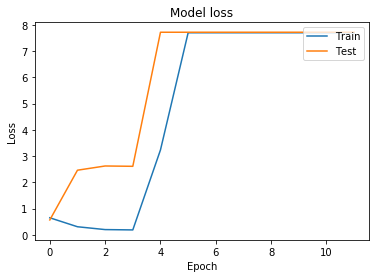

In [58]:
# Visualize the results:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()